# Tutorial

[Introductory Overview of PyMC — PyMC 5.16.2 documentation](https://www.pymc.io/projects/docs/en/stable/learn/core_notebooks/pymc_overview.html)

In [1]:
import arviz as az
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
%config InlineBackend.figure_format = 'retina'
# Initialize random number generator
RANDOM_SEED = 8927
rng = np.random.default_rng(RANDOM_SEED)
az.style.use("arviz-darkgrid")# True parameter values
alpha, sigma = 1, 1
beta = [1, 2.5]

# Size of dataset
size = 100

# Predictor variable
X1 = np.random.randn(size)
X2 = np.random.randn(size) * 0.2

# Simulate outcome variable
Y = alpha + beta[0] * X1 + beta[1] * X2 + rng.normal(size=size) * sigma

In [3]:
# True parameter values
alpha, sigma = 1, 1
beta = [1, 2.5]

# Size of dataset
size = 100

# Predictor variable
X1 = np.random.randn(size)
X2 = np.random.randn(size) * 0.2

# Simulate outcome variable
Y = alpha + beta[0] * X1 + beta[1] * X2 + rng.normal(size=size) * sigma

Text(0.5, 0, 'X2')

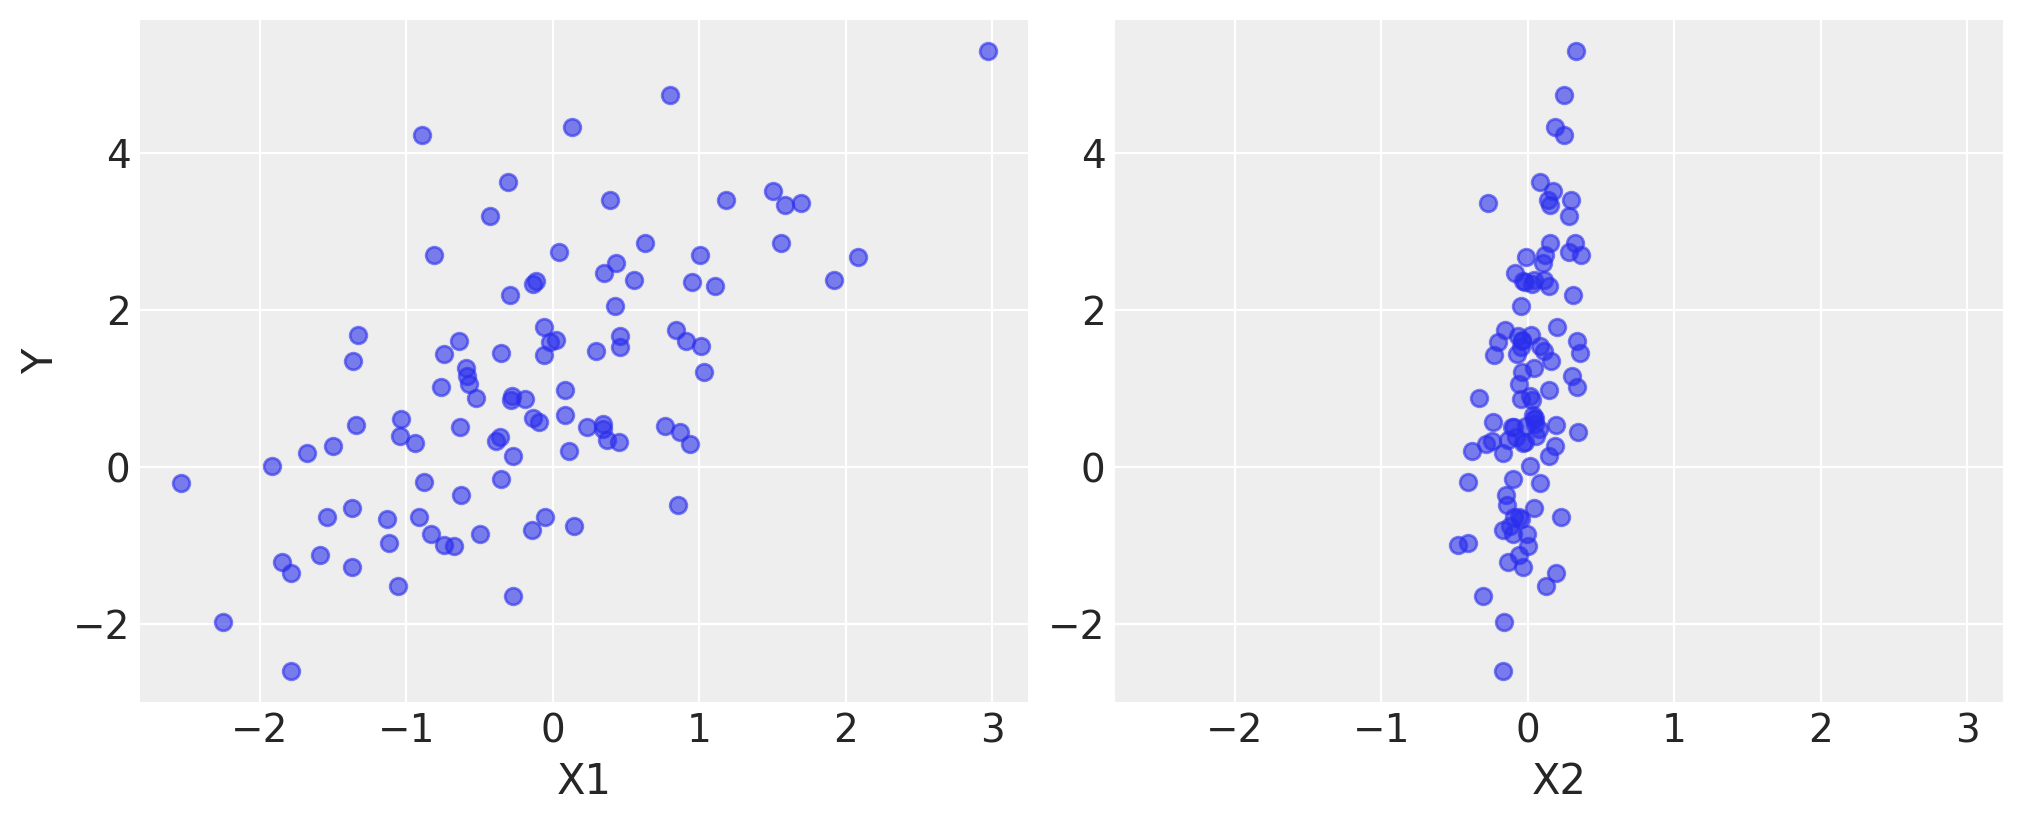

In [4]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(10, 4))
axes[0].scatter(X1, Y, alpha=0.6)
axes[1].scatter(X2, Y, alpha=0.6)
axes[0].set_ylabel("Y")
axes[0].set_xlabel("X1")
axes[1].set_xlabel("X2")

In [5]:
import pymc as pm

print(f"Running on PyMC v{pm.__version__}")

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


Running on PyMC v5.15.0


In [6]:
basic_model = pm.Model()

with basic_model:
    # Priors for unknown model parameters
    alpha = pm.Normal("alpha", mu=0, sigma=10)
    beta = pm.Normal("beta", mu=0, sigma=10, shape=2)
    sigma = pm.HalfNormal("sigma", sigma=1)

    # Expected value of outcome
    mu = alpha + beta[0] * X1 + beta[1] * X2

    # Likelihood (sampling distribution) of observations
    Y_obs = pm.Normal("Y_obs", mu=mu, sigma=sigma, observed=Y)

In [7]:
type(mu)

pytensor.tensor.variable.TensorVariable

In [8]:
with basic_model:
    # draw 1000 posterior samples
    idata = pm.sample(idata_kwargs = {"log_likelihood": True})

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta, sigma]


/home/hope/workspace/time-series-information-criterion/.venv/lib/python3.12/site-packages/rich/live.py:231: 
UserWarning: install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.


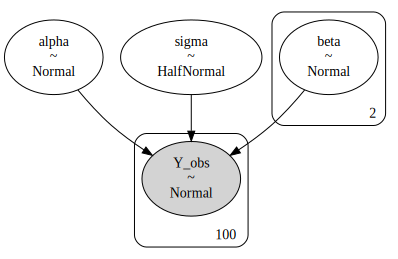

In [9]:
pm.model_to_graphviz(basic_model)

In [10]:
idata

Inference data with groups:
	> posterior
	> log_likelihood
	> sample_stats
	> observed_data

In [11]:
idata.posterior["alpha"].sel(draw=slice(0, 11))

<xarray.DataArray 'alpha' (chain: 4, draw: 12)> Size: 384B
array([[1.21867109, 1.11962049, 1.25955705, 1.28401998, 1.12685435,
        1.07716401, 1.21117371, 1.21117371, 1.19638932, 1.04679699,
        1.17714602, 1.08393396],
       [1.1974653 , 1.04731551, 1.24050804, 1.14837689, 1.14888749,
        1.1398179 , 1.1398179 , 1.090476  , 1.18236263, 0.96335821,
        1.150789  , 1.05590633],
       [1.22370021, 1.02393621, 1.0116796 , 1.08269547, 1.06707525,
        0.98042526, 1.10455488, 1.10562521, 1.03716967, 1.22635693,
        1.08619234, 1.17009438],
       [1.0811617 , 1.12985243, 1.07805733, 1.16846181, 1.14994352,
        1.30697916, 1.10233174, 1.09922348, 0.98501329, 1.24670713,
        0.95586755, 1.2612164 ]])
Coordinates:
  * chain    (chain) int64 32B 0 1 2 3
  * draw     (draw) int64 96B 0 1 2 3 4 5 6 7 8 9 10 11

In [12]:
az.summary(idata)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,1.117,0.109,0.903,1.306,0.002,0.001,4796.0,3063.0,1.0
beta[0],0.881,0.114,0.666,1.093,0.002,0.001,4978.0,3168.0,1.0
beta[1],3.221,0.613,2.141,4.419,0.010,0.007,4094.0,2763.0,1.0
sigma,1.094,0.077,0.959,1.245,0.001,0.001,5663.0,3387.0,1.0


array([[<Axes: title={'center': 'alpha'}>,
        <Axes: title={'center': 'alpha'}>],
       [<Axes: title={'center': 'beta'}>,
        <Axes: title={'center': 'beta'}>],
       [<Axes: title={'center': 'sigma'}>,
        <Axes: title={'center': 'sigma'}>]], dtype=object)

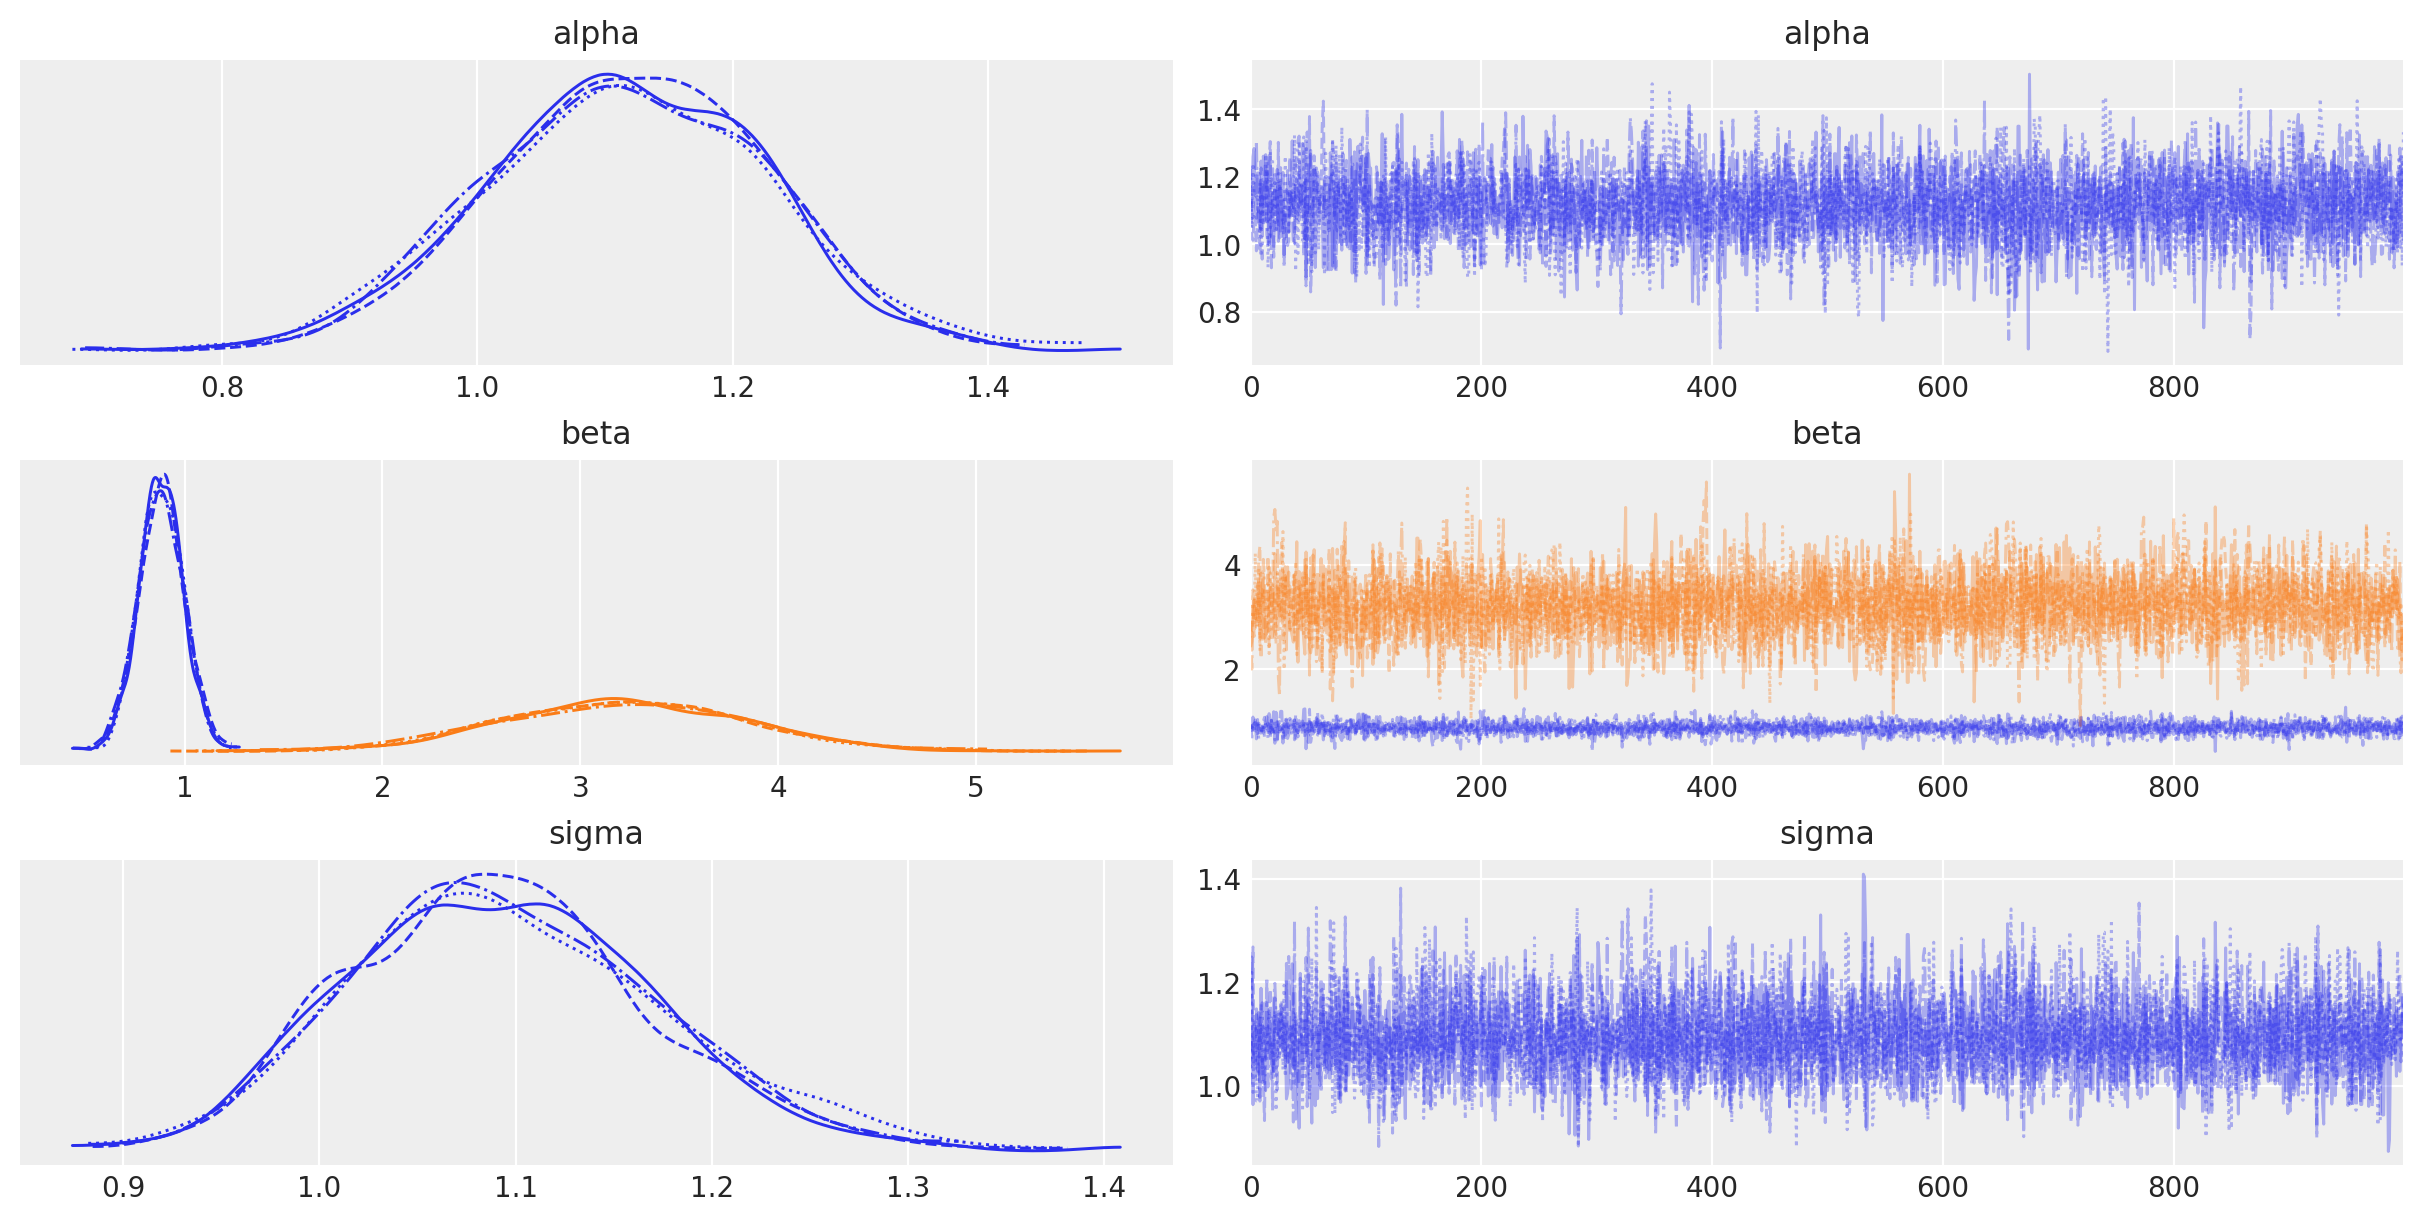

In [13]:
az.plot_trace(idata)

In [14]:
with basic_model:
    predictive = pm.sample_posterior_predictive(idata)

Sampling: [Y_obs]


/home/hope/workspace/time-series-information-criterion/.venv/lib/python3.12/site-packages/rich/live.py:231: 
UserWarning: install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

In [15]:
# Check predictive and observed values

print(Y[:5])
print(predictive.posterior_predictive["Y_obs"].shape)


[2.84914804 1.48175668 2.35365892 0.6227405  2.84822023]
(4, 1000, 100)


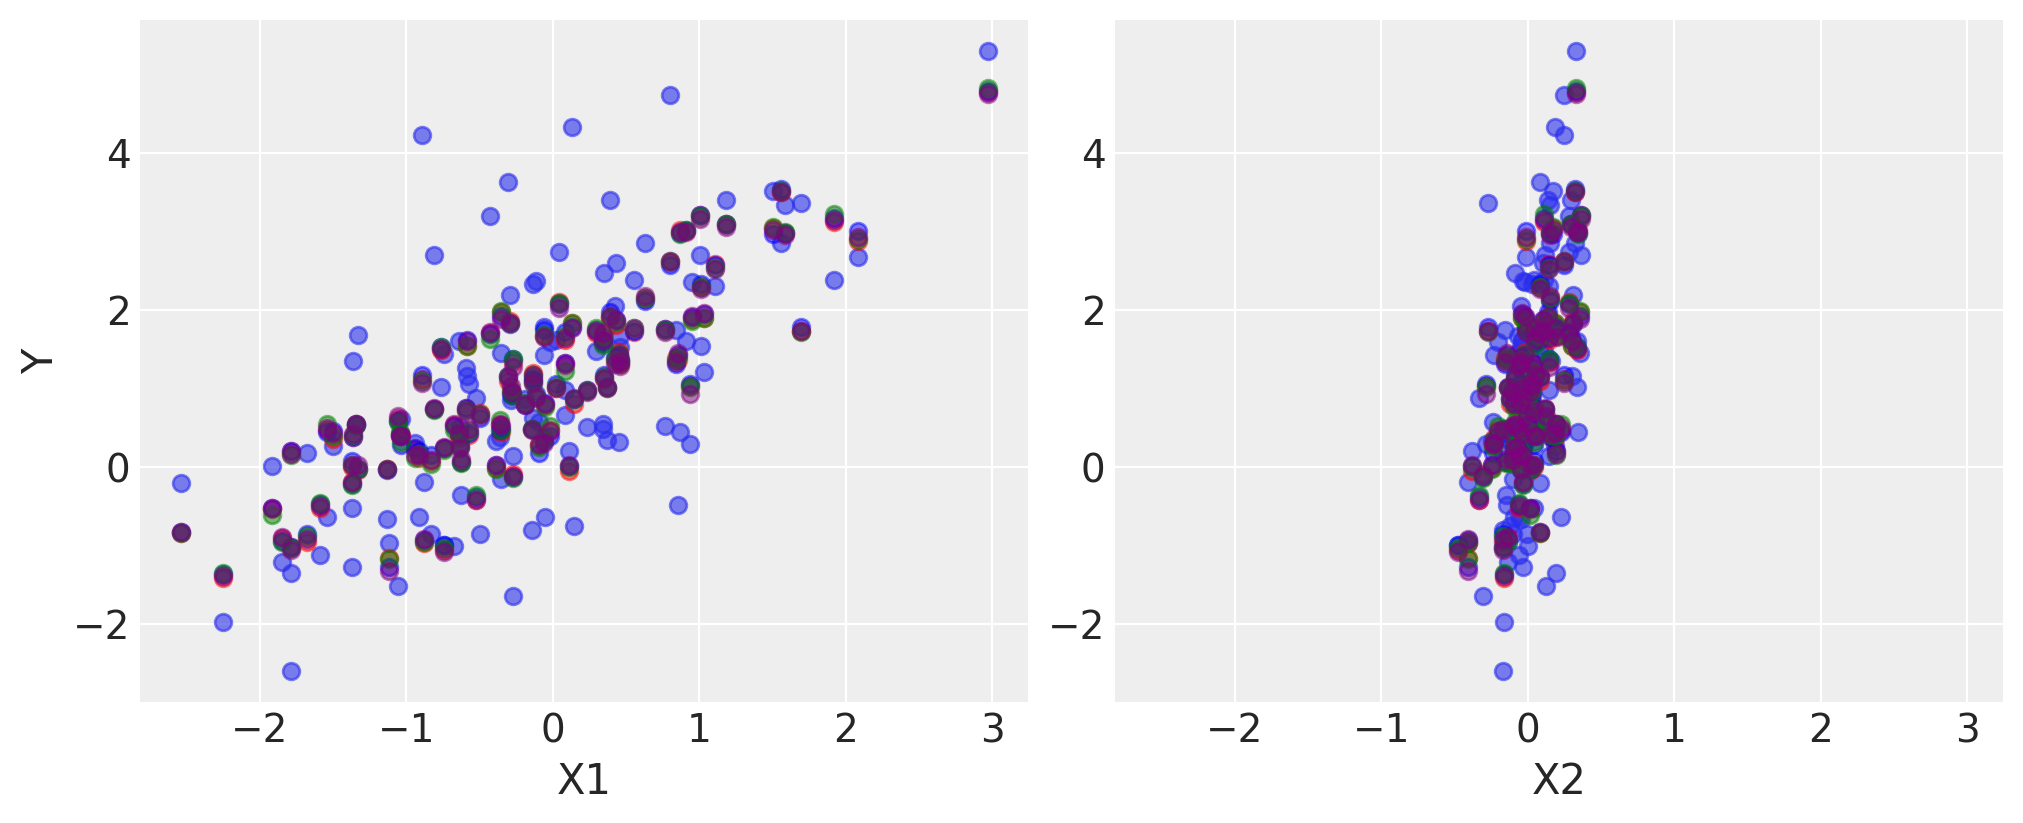

In [16]:
# Plot observed data and predictions
# WARNING: The size of prediction is n_chain * n_draw

fig, axes = plt.subplots(1, 2, sharex=True, figsize=(10, 4))
axes[0].scatter(X1, Y, alpha=0.6)
axes[1].scatter(X2, Y, alpha=0.6)
axes[0].set_ylabel("Y")
axes[0].set_xlabel("X1")
axes[1].set_xlabel("X2")

colors = ["red", "blue", "green", "purple", "gray"]

for chain in range(predictive.posterior_predictive["Y_obs"].shape[0]):
    y_pred = predictive.posterior_predictive["Y_obs"][chain].mean(axis=0)
    axes[0].scatter(X1, y_pred, c=colors[chain], alpha=0.5)
    axes[1].scatter(X2, y_pred, c=colors[chain], alpha=0.5)

In [17]:
# calculate waic

waic = az.waic(idata)
print(waic)

Computed from 4000 posterior samples and 100 observations log-likelihood matrix.

          Estimate       SE
elpd_waic  -152.62     7.19
p_waic        3.76        -

There has been a warning during the calculation. Please check the results.


/home/hope/workspace/time-series-information-criterion/.venv/lib/python3.12/site-packages/arviz/stats/stats.py:1647: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(
